<a href="https://colab.research.google.com/github/JainHarshi/ANPR-Number-Plate-Detection/blob/main/Detecting_Car_Number_Plate_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check version of CUDA

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless--4.1.2.30
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 10.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement opencv-python-headless--4.1.2.30 (from versions: none)
ERROR: No matching distribution found for opencv-python-headless--4.1.2.30
Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**CONVERT COLOR IMG TO GRAYSCALE FORMAT**

In [17]:
img1 = cv2.imread("/img.jpg")

In [18]:
gray = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)

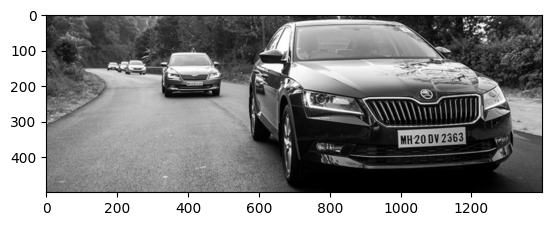

In [20]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**APPLY FILTER AND EDGE DETECTION**

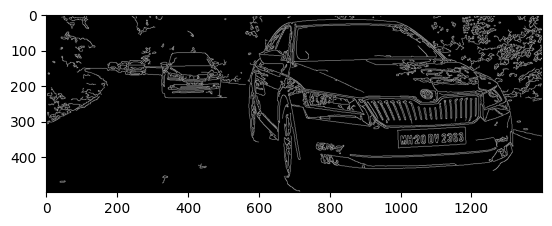

In [22]:
bfilter= cv2.bilateralFilter(gray, 11 , 17 , 17) #Noise reduction
edged = cv2.Canny(bfilter, 30 , 200 ) #Edge Detection
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB))

**FIND CONTOURS AND APPLY MASK**

In [23]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
contours = imutils.grab_contours(keypoints)

In [27]:
contours = sorted(contours , key= cv2.contourArea, reverse = True)[:10]

In [29]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour , 10 , True)
  if len(approx) == 4:
    location = approx
    break

In [19]:
if img is None:
    print("Error: Could not load the image.")
else:
    print("Error:  load the image.")
    # Perform further operations on the image.

Error: Could not load the image.


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')